In [37]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib

#### 1. 이미지 불러오기 

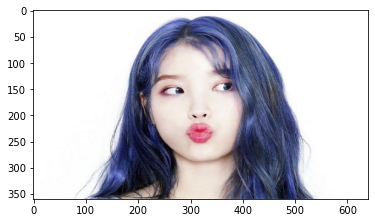

In [163]:
my_image_path = os.getenv('HOME') + '/Aiffel/10_sticker_camera/images/image.jpg'
img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.resize(img_bgr, (640, 360))
img_show = img_bgr.copy()
img_orig = img_bgr.copy()
img_orig_alpha = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

#### 2. 얼굴 검출 & 랜드마크 검출하기

In [164]:
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)

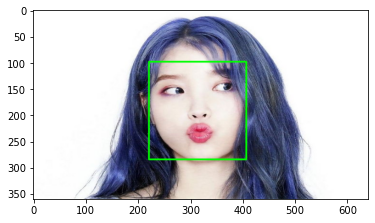

In [165]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [166]:
# 랜드 마크 표시를 위한 weights 불러오기
model_path = os.getenv('HOME') + '/Aiffel/10_sticker_camera/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [167]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

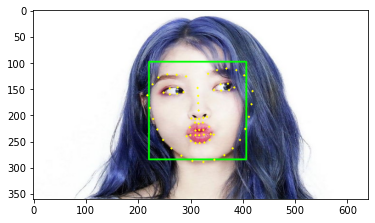

In [168]:
for landmark in list_landmarks:
    for idx, point in enumerate(landmark):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()
    

#### 3. 스티커 적용 위치 확인하기

In [169]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[33])
    x = landmark[33][0]
    y = landmark[33][1]
    w = int(dlib_rect.width() // 1.7)
    h = landmark[50][1] - landmark[30][1]
    
    print(f'(x, y) : ({x}, {y})')
    print(f'(w, h) : ({w}, {h})')

(317, 207)
(x, y) : (317, 207)
(w, h) : (110, 23)


#### 4. 스티커 적용하기

In [170]:
sticker_path = os.getenv('HOME')+'/Aiffel/10_sticker_camera/images/cat_whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))
print(img_sticker.shape)

(23, 110, 3)


In [171]:
refined_x = x - w // 2
refined_y = y - h // 2
print(f'(x, y) : ({refined_x}, {refined_y})')

(x, y) : (262, 196)


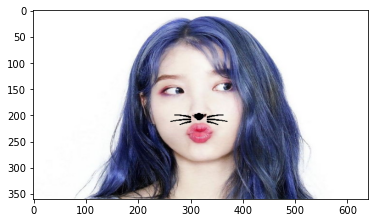

In [172]:
sticker_area = img_orig[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_orig[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

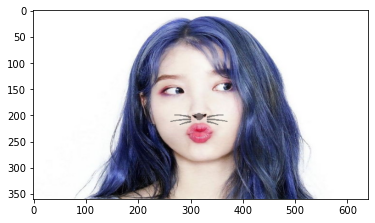

In [173]:
mix = 45
sticker_area = img_orig_alpha[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_orig_alpha[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
 np.where(img_sticker==255,sticker_area,cv2.addWeighted(sticker_area, float(100-mix)/100, img_sticker, float(mix)/100, 0)).astype(np.uint8)
    
plt.imshow(cv2.cvtColor(img_orig_alpha, cv2.COLOR_BGR2RGB))
plt.show()